In [1]:
import numpy as np
import csv

import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt

import sys
import os
folder = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.insert(0, folder)
import theory2

In [2]:
gamma = 0.5
alpha = 1
Delta = 0.1
vlaw = 'gauss'
sig = lambda x: (x**2 - 1)/np.sqrt(2.0) + (x**3 - 3*x)/6
q2_sp = theory2.sp_quantities(sig, alpha, gamma, Delta, vlaw, prior='gauss')['q2']
q2_uni = theory2.uni_quantities(vlaw, sig, alpha, gamma, Delta)['q2']

In [3]:
data = np.loadtxt('data.csv', delimiter=',')

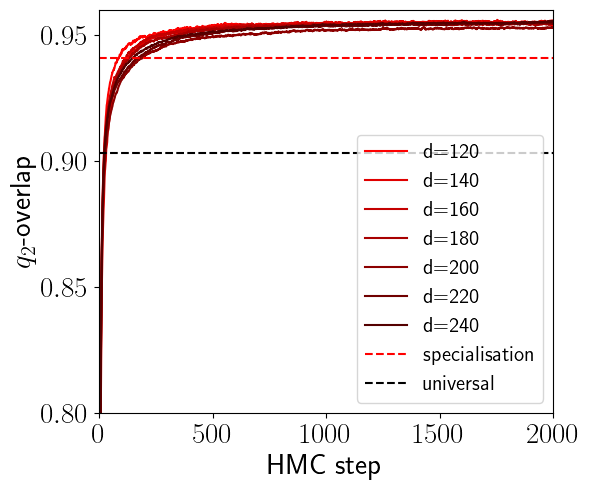

In [8]:
ds = [120, 140, 160, 180, 200, 220, 240]


colors = [
    "#FF0000", "#E00000", "#C40000", "#A80000",
    "#8C0000", "#700000", "#540000", "#3A0000", "#330000"
]

width, height = 6, 5
big, small = int(width*4.5), int(width*3.5)
fig, ax = plt.subplots(figsize=(width, height), tight_layout=True)
for d, color in zip(ds, colors):
    indexes = (data[:, 0]==d)
    dat = data[indexes][:, 1:]
    dat_mean = np.mean(dat, axis=0)
    dat_std = np.std(dat, axis=0)
    plt.plot(dat_mean, color=color, label=f'd={d}')
    # plt.fill_between(np.arange(len(dat_mean)), dat_mean-dat_std, dat_mean+dat_std, color=color, alpha=0.2)
    
plt.axhline(y=q2_sp, color='red', linestyle='--', label='specialisation')
plt.axhline(y=q2_uni, color='black', linestyle='--', label='universal')


plt.xlim(0, 2000)
plt.ylim(0.8,0.96)
plt.tick_params(axis='both', labelsize=small)
plt.xlabel('HMC step', fontsize=small)
plt.ylabel(r'$q_2$-overlap', fontsize=small)
plt.legend(fontsize=15, loc='lower right')
plt.savefig(f'{vlaw}.pdf')

In [21]:
q2_uni, q2_sp

(0.9033124376356009, 0.94079451039893)

In [13]:
thres1, thres2, thres3 = 0.94, 0.945, 0.95

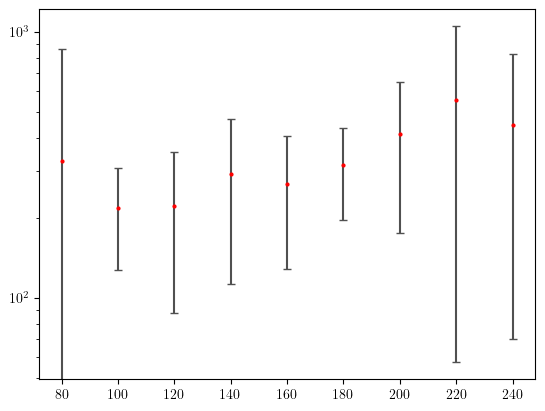

In [19]:
thres=thres3
ds = [80, 100, 120, 140, 160, 180, 200, 220, 240]
means, stds = [], []
for d in ds:
    indexes = (data[:, 0]==d)
    subdata = data[indexes][:, 1:]
    ts = [(dat>thres).argmax() for dat in subdata]
    mean, std = np.mean(ts), np.std(ts)
    means.append(mean)
    stds.append(std)

plt.errorbar(ds, means, yerr=stds, fmt='o', markersize=2, capsize=3, color='red', ecolor='#505050')
plt.yscale('log')
plt.show()

In [20]:
with open(f'v_{vlaw}_thres3.csv', 'a', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(ds)
    writer.writerow(means)
    writer.writerow(stds)